<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Applied--Q8-simple-lm-on-Auto-dataset" data-toc-modified-id="Applied--Q8-simple-lm-on-Auto-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Applied  Q8 simple lm on <code>Auto</code> dataset</a></span><ul class="toc-item"><li><span><a href="#(a)-lm-model-:-mpg-~-horsepower" data-toc-modified-id="(a)-lm-model-:-mpg-~-horsepower-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>(a) lm model : <code>mpg</code> ~ <code>horsepower</code></a></span></li><li><span><a href="#plot-and-display-least-square-regression-line" data-toc-modified-id="plot-and-display-least-square-regression-line-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>plot and display least square regression line</a></span></li><li><span><a href="#diagnostic-plots-of-the-linear-regression-ﬁt" data-toc-modified-id="diagnostic-plots-of-the-linear-regression-ﬁt-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>diagnostic plots of the linear regression ﬁt</a></span><ul class="toc-item"><li><span><a href="#plot-1-:-residual-against-fitted-values" data-toc-modified-id="plot-1-:-residual-against-fitted-values-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>plot 1 : residual against fitted values</a></span></li><li><span><a href="#plot-2-:-normal-Q-Q-plot" data-toc-modified-id="plot-2-:-normal-Q-Q-plot-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>plot 2 : normal Q-Q plot</a></span></li><li><span><a href="#plot-3-:-Scale-Location-plot-of-sqrt(|residuals|)-against-fitted-values" data-toc-modified-id="plot-3-:-Scale-Location-plot-of-sqrt(|residuals|)-against-fitted-values-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>plot 3 : Scale-Location plot of sqrt(|residuals|) against fitted values</a></span></li><li><span><a href="#plot-4-:-Residuals-against-leverages" data-toc-modified-id="plot-4-:-Residuals-against-leverages-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>plot 4 : Residuals against leverages</a></span></li></ul></li></ul></li></ul></div>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Applied  Q8 simple lm on `Auto` dataset

In [3]:
auto = pd.read_csv('Auto.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


## (a) lm model : `mpg` ~ `horsepower`

In [7]:
# prepare data for modelling (training set)
x_train = auto['horsepower']
y_train = auto['mpg']
y_train.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [8]:
x_train.head()

0    130
1    165
2    150
3    150
4    140
Name: horsepower, dtype: object

In [6]:
# we fing the predictor 'horsepower' dtype is object
x_train.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [10]:
# we find a strange value '?'
# then hadle with strange value '?' -- delete
droplist= x_train[x_train == '?'].index
droplist

Int64Index([32, 126, 330, 336, 354], dtype='int64')

In [16]:
x_train.drop(index=droplist,inplace=True)
y_train.drop(index=droplist, inplace=True)
# ensure dimensional compatibility between variables

In [20]:
# test
'?' in x_train.unique()

False

In [21]:
# check for data quality -- missing data , errors , ets
y_train.unique()

array([18. , 15. , 16. , 17. , 14. , 24. , 22. , 21. , 27. , 26. , 25. ,
       10. , 11. ,  9. , 28. , 19. , 12. , 13. , 23. , 30. , 31. , 35. ,
       20. , 29. , 32. , 33. , 17.5, 15.5, 14.5, 22.5, 24.5, 18.5, 29.5,
       26.5, 16.5, 31.5, 36. , 25.5, 33.5, 20.5, 30.5, 21.5, 43.1, 36.1,
       32.8, 39.4, 19.9, 19.4, 20.2, 19.2, 25.1, 20.6, 20.8, 18.6, 18.1,
       17.7, 27.5, 27.2, 30.9, 21.1, 23.2, 23.8, 23.9, 20.3, 21.6, 16.2,
       19.8, 22.3, 17.6, 18.2, 16.9, 31.9, 34.1, 35.7, 27.4, 25.4, 34.2,
       34.5, 31.8, 37.3, 28.4, 28.8, 26.8, 41.5, 38.1, 32.1, 37.2, 26.4,
       24.3, 19.1, 34.3, 29.8, 31.3, 37. , 32.2, 46.6, 27.9, 40.8, 44.3,
       43.4, 36.4, 44.6, 33.8, 32.7, 23.7, 32.4, 26.6, 25.8, 23.5, 39.1,
       39. , 35.1, 32.3, 37.7, 34.7, 34.4, 29.9, 33.7, 32.9, 31.6, 28.1,
       30.7, 24.2, 22.4, 34. , 38. , 44. ])

In [36]:
# create dataframe to fit model
# for convenience, we set horsepower dtype as float
df1 = pd.DataFrame({'mpg' : y_train.astype('float'), 'horsepower':x_train.astype('float')})
df1.head()

,mpg,horsepower
0,18.0,130.0
1,15.0,165.0
2,18.0,150.0
3,16.0,150.0
4,17.0,140.0


In [37]:
df1['horsepower'].head()

0    130.0
1    165.0
2    150.0
3    150.0
4    140.0
Name: horsepower, dtype: float64

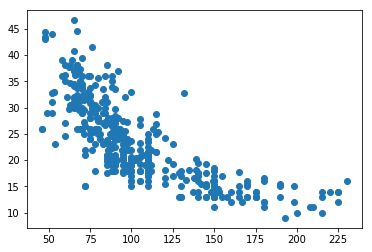

In [82]:
# plot
plt.scatter(df1['horsepower'],df1['mpg'])

In [67]:
# use statsmodel to fit simple lm
# http://www.statsmodels.org/stable/index.html
# OLS : ordinary least square
mod1 = smf.ols(formula='mpg ~ horsepower' ,data=df1)
res= mod1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           7.03e-81
Time:                        16:01:15   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
# use arrays instead of formula
# in this way we do not have the constant intercept
res = sm.OLS(df1['mpg'],df1['horsepower']).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     723.7
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           5.67e-91
Time:                        14:56:32   Log-Likelihood:                -1608.1
No. Observations:                 392   AIC:                             3218.
Df Residuals:                     391   BIC:                             3222.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
horsepower     0.1788      0.007     26.901      0.000       0.166       0.192
==============================================================================
Omnibus:                       13.847   Durbin-Watson:                   0.471
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                9.780
Skew:                          -0.268   Prob(JB):                      0.00752
Kurtosis:                       2.442   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Comment**

1.  There's a relationship between preditor `horsepower` and response `mpg`. Since the P-value(F-statistic) is close to zero and F-statistics is much larger than 1, we can reject hte null hypothesis.

2.  The R-square is about 0.606, we can say approximatley 60% of the variance of `mpg` is explained by `horsepower`. 

3.  For the coefficient of `horsepower` is -0.1578, we can know the relationship is negative.

4.  predicted `mpg` value associated with a `horsepower` of 98, confidence interval, prediction interval:

In [61]:
from scipy.stats import t
from math import sqrt

![](conf_pred.PNG)

In [64]:
def interval(x, y , x0, alpha = .05):
    n = np.size(x)
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    
    s_xx = np.sum((x-x_bar)**2)
    s_xy = np.sum((x-x_bar) * (y -y_bar))
    
    # linear formula
    b = s_xy / s_xx
    a = y_bar - b*x_bar
    
    MSE = np.sum( (y-a-b*x)**2 )/n
    print('MSE : ',MSE)    
    
    ts = t.ppf(1- alpha/2, n-2)
    print('ts : ', ts)
    
    fit_value = a+b*x0
    w_pred = ts*sqrt(MSE)* sqrt(1+1/n+(x0-x_bar)**2/s_xx)
    w_conf = ts*sqrt(MSE)* sqrt(1/n+(x0-x_bar)**2/s_xx)    
    
    
    print('                      fit \t lwr \t upr')
    print('confidence interval %3.5f %3.5f %3.5f' % (fit_value,  fit_value-w_conf, fit_value +w_conf ))
    print('confidence interval %3.5f %3.5f %3.5f' % (fit_value,  fit_value-w_pred, fit_value +w_pred))  

In [65]:
interval(df1['horsepower'], df1['mpg'], 98)

MSE :  23.943662938603108
ts :  1.9660653313010235
                      fit 	 lwr 	 upr
confidence interval 24.46708 23.97434 24.95981
confidence interval 24.46708 14.83406 34.10009


## plot and display least square regression line

In [78]:
df1['mpg'].unique()

array([18. , 15. , 16. , 17. , 14. , 24. , 22. , 21. , 27. , 26. , 25. ,
       10. , 11. ,  9. , 28. , 19. , 12. , 13. , 23. , 30. , 31. , 35. ,
       20. , 29. , 32. , 33. , 17.5, 15.5, 14.5, 22.5, 24.5, 18.5, 29.5,
       26.5, 16.5, 31.5, 36. , 25.5, 33.5, 20.5, 30.5, 21.5, 43.1, 36.1,
       32.8, 39.4, 19.9, 19.4, 20.2, 19.2, 25.1, 20.6, 20.8, 18.6, 18.1,
       17.7, 27.5, 27.2, 30.9, 21.1, 23.2, 23.8, 23.9, 20.3, 21.6, 16.2,
       19.8, 22.3, 17.6, 18.2, 16.9, 31.9, 34.1, 35.7, 27.4, 25.4, 34.2,
       34.5, 31.8, 37.3, 28.4, 28.8, 26.8, 41.5, 38.1, 32.1, 37.2, 26.4,
       24.3, 19.1, 34.3, 29.8, 31.3, 37. , 32.2, 46.6, 27.9, 40.8, 44.3,
       43.4, 36.4, 44.6, 33.8, 32.7, 23.7, 32.4, 26.6, 25.8, 23.5, 39.1,
       39. , 35.1, 32.3, 37.7, 34.7, 34.4, 29.9, 33.7, 32.9, 31.6, 28.1,
       30.7, 24.2, 22.4, 34. , 38. , 44. ])

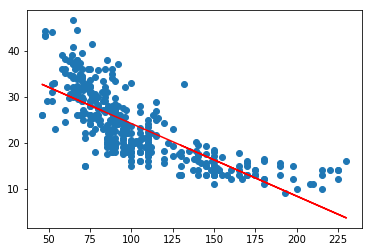

In [84]:
#plt.subplots(11)
plt.scatter(df1['horsepower'],df1['mpg'])
plt.plot(df1['horsepower'].astype('float'), res.fittedvalues,color = 'red')

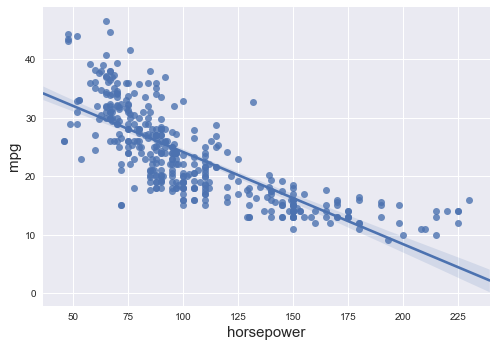

In [89]:
# OR use sns regplot
sns.regplot(df1['horsepower'], df1['mpg'])

## diagnostic plots of the linear regression ﬁt

In R, by default, `plot()` on a fit produces 4 plots: 
*   a plot of residuals against fitted values, 
*   a Scale-Location plot of sqrt(| residuals |) against fitted values, 
*   a Normal Q-Q plot, 
*   a plot of residuals against leverages.

In [131]:
# we already have fitted model:
fitted = smf.ols('mpg ~ horsepower', data =df1).fit()

In [86]:
from statsmodels.graphics.gofplots import ProbPlot

In [88]:
plt.style.use('seaborn')
plt.rc('font', size= 14)
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

### plot 1 : residual against fitted values

In [110]:
sns.residplot?

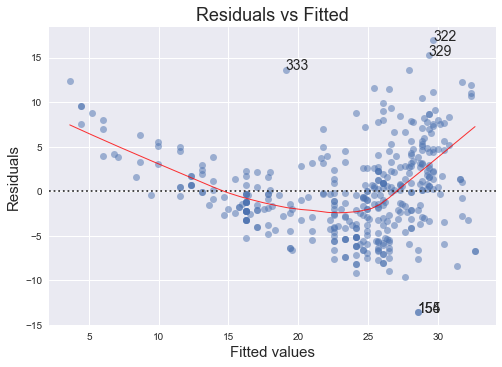

In [133]:
p1 = sns.residplot(fitted.fittedvalues,df1['mpg'], lowess=True, 
                   scatter_kws={'alpha':0.5},
                   line_kws={'color': 'red', 'lw':1, 'alpha':0.8})
p1.set_title('Residuals vs Fitted')
p1.set_xlabel('Fitted values')
p1.set_ylabel('Residuals')

# anotations
abs_resid = np.abs(fitted.resid)
top5 = abs_resid.sort_values(ascending=False)[:5]
#print(top5)
for i in top5.index:
    #print(fitted.fittedvalues[i], fitted.resid[i])
    p1.annotate(i, xy=(fitted.fittedvalues[i], fitted.resid[i]))

**Comment**

The red line is a smooth fit to the residuals which helps to spot any trends. We can clearly see a strong non-linearity indicated by the curve of the red line. Figure 3.9 of the textbook also comments on this and shows the same plot for a quadratical fit, where the this trend is now almost non-existant. The funnel shape of the plotted residuals indicates that we are in the presence of heteroscedasticity.


### plot 2 : normal Q-Q plot

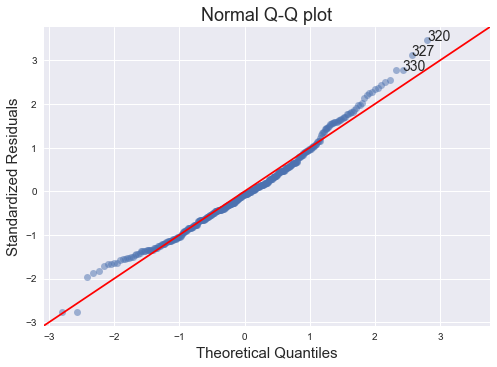

In [170]:
#normalize residuals
model_norm_resid = fitted.get_influence().resid_studentized_internal
QQ = ProbPlot(model_norm_resid)
p2_qqplot = QQ.qqplot(line ='45', alpha = .5 ,color = '#4C72B0',lw =1)
p2_qqplot.axes[0].set_ylabel('Standardized Residuals')
p2_qqplot.axes[0].set_title('Normal Q-Q plot')

# anotations
top3 = np.flip(np.argsort(np.abs(model_norm_resid )),0)[:3]
#print(top3)
for r, i in enumerate(top3):
    #print(fitted.fittedvalues[i], fitted.resid[i])
    p2_qqplot.axes[0].annotate(i, xy=(np.flip(QQ.theoretical_quantiles ,0)[r],
                                     model_norm_resid[i]))

**Comment**

The qq-plot indicates that the assumption of normality does hold, since we can fit a straight line quite well, although there seems to be a slight left skew.

The links below provide nice explanations and intuitions of the concept of qq-plots and pp-plots and how to interpret them.

*  https://stats.stackexchange.com/questions/52212/qq-plot-does-not-match-histogram/52221#52221
*  https://stats.stackexchange.com/questions/101274/how-to-interpret-a-qq-plot
*  https://xiongge.shinyapps.io/QQplots/
*  https://stats.stackexchange.com/questions/92141/pp-plots-vs-qq-plots/100383#100383


### plot 3 : Scale-Location plot of sqrt(|residuals|) against fitted values

This plot is similar to the first one - it plots the residuals against the fitted values, **although here they are all made positive and normalized**. It is clear from the plot that the assumption of homoscedasticity is not held.

Text(0, 0.5, '$\\sqrt{|Standardized Residuals|}$')

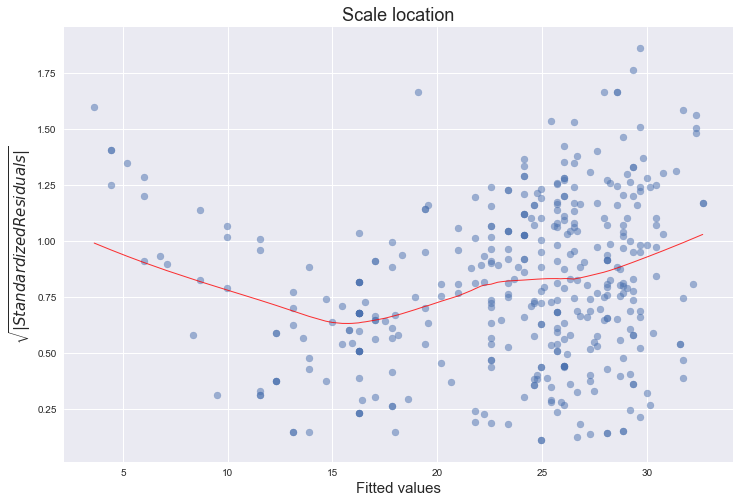

In [196]:
p3 = plt.figure(3)
p3.set_figheight(8)
p3.set_figwidth(12)
plt.scatter(fitted.fittedvalues, np.sqrt(np.abs(model_norm_resid )), alpha=.5)
sns.regplot(fitted.fittedvalues, np.sqrt(np.abs(model_norm_resid )), 
           scatter=False, ci = True, lowess=True, 
           line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
p3.axes[0].set_title('Scale location')
p3.axes[0].set_xlabel('Fitted values')
p3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$')

"The third plot is a scale-location plot (square rooted standardized residual vs. predicted value). This is useful for checking the assumption of homoscedasticity. In this particular plot we are checking to see if there is a pattern in the residuals."[source](http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/R/R5_Correlation-Regression/R5_Correlation-Regression7.html)





### plot 4 : Residuals against leverages

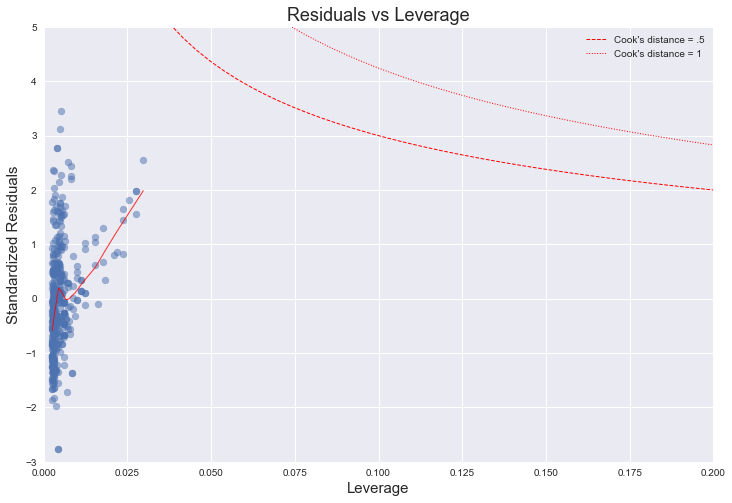

In [204]:
p4 = plt.figure(4)
p4.set_figheight(8)
p4.set_figwidth(12)

model_leverage = fitted.get_influence().hat_matrix_diag
model_cooks = fitted.get_influence().cooks_distance[0]

plt.scatter(model_leverage,model_norm_resid, alpha=.5)
sns.regplot(model_leverage, model_norm_resid,
           scatter=False, ci = True, lowess=True, 
           line_kws = {'color':'red', 'lw':1, 'alpha':.8})

p4.axes[0].set_xlim(0,.2)
p4.axes[0].set_ylim(-3, 5)
p4.axes[0].set_title('Residuals vs Leverage')
p4.axes[0].set_xlabel('Leverage')
p4.axes[0].set_ylabel('Standardized Residuals')

# cook's distance contours

def graph(formula, x_range, label = None, ls = '-'):
    x=x_range
    y= formula(x)
    plt.plot(x,y, label=label, lw=1, ls= ls,color ='red')

# number of model parameters
p = len(fitted.params)

# 0.5 line
graph(lambda x: np.sqrt((.5*p*(1-x))/x), 
     np.linspace(.001,.2,50),
     'Cook\'s distance = .5', ls ='--')

# 1 line
graph(lambda x: np.sqrt((1*p*(1-x))/x), 
     np.linspace(.001,.2,50),
     'Cook\'s distance = 1', ls =':')

plt.legend(loc = 'upper right')

The higher leverage points concentrate on the upper half of this plot, which indicates a deviation from normality. On the other hand, from the plot we can see that every point has a Cook's distance well below 1, which indicates that no point has much individual influence on the fit.

"The fourth plot is of "Cook's distance", which is a measure of the influence of each observation on the regression coefficients. The Cook's distance statistic is a measure, for each observation in turn, of the extent of change in model estimates when that particular observation is omitted. Any observation for which the Cook's distance is close to 1 or more, or that is substantially larger than other Cook's distances (highly influential data points), requires investigation." [source]( http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/R/R5_Correlation-Regression/R5_Correlation-Regression7.html)